# Student Mental Wellness 
**Author: Ayaan Yousaf**

Mental health as a whole is a vast and intricate topic. In this report, I will primarily focus on the mental well-being of students in higher education as it is a helpful topic to understand as a student myself, and for anyone currently enrolled in a college or university program. The mental well-being of students remains an important topic as the standards of education evolve. The dataset I have chosen on the mental health of students serves as a key resource and allows me to explore various different factors and identify relationships between them. Upon initial inspection of this dataset, I became interested in the relationships between variables such as the student's year of study and how it may correlate to their mental health. Do students who have just begun their studies deal with more mental health issues? What about students who are in the middle or end of their studies? We can also explore this on a larger scope, how does gender and age come in to play? There are many questions we can answer by analyzing this dataset, and it may be useful for students to understand these relationships to maintain a healthy mindset.

![Mental Health Image](https://miro.medium.com/v2/resize:fit:786/format:webp/1*nhiHy8jjnEtMrNzKl3SIRg.jpeg)

<p style="font-size: x-small">Gabrielle Pamandanan, via <a href="https://medium.com/@gabloisanne18/the-difference-in-mental-health-between-public-and-private-schools-89dc2124bae0">[Medium]</p>

 To aid me in my analysis, I will investigate the following variables: 
 - Gender: the student's gender
 - Age: the student's age 
 - Year: the student's year of study ranging from first year to fourth year 
 - CGPA: the student's cumulative grade-point average given as a range (e.g. 3.50-4.00)
 - Depression: does the student have depression? 
 - Anxiety: does the student have anxiety? 
 - Panic Attacks: does the student experience panic attacks? 
 - Treatment: has the student sought any form of treatment? 

## Methods 
### Data Collection
The dataset analyzed in this assignment was obtained from [Kaggle](https://www.kaggle.com/datasets/shariful07/student-mental-health/data), a large resource providing many different datasets.

In [1]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
import csv 

# Import data into Python and store it as a pandas dataframe 
students = pd.read_csv('student_data.csv')

### Cleaning and Preprocessing Data 
> Initially, I will remove any unnecessary columns in the dataset as they are irrelevant to the questions I want to answer. <br> I will also remove the "What is your course?" column as this dataset contains a wide variety of majors/programs that will not be helpful for analysis. </br>

In [2]:
# Drop unnecessary columns
students = students.drop(columns=["Timestamp", "Marital status", "What is your course?"])

> Most columns in this dataset are named as a question and are too lengthy. I will shorten these column names and rename them as needed.

In [3]:
# Update column names 
students.columns = ["Gender", "Age", "Year", "CGPA", "Depression", "Anxiety", "Panic Attacks", "Treatment"]

> I will also be updating the values for columns where the data is either "Yes" or "No" to 0 for "No" and 1 for "Yes". Modifying these values to be represented in a numeric way will allow me to obtain summary statistics easily. The values for the "Year" column will also be changed to numeric values to improve readability.

> I also noticed some values in the "Year" column were capitalized, and some were not. Both of these values will be taken into account when applying the replace method.

In [4]:
# Update values to numeric format using dict-like replace
students = students.replace({'Yes': 1, 'No': 0, 'year 1': 1, 'year 2': 2, 'year 3': 3, 'year 4': 4,
                             'Year 1': 1, 'Year 2': 2, 'Year 3': 3, 'Year 4': 4}
                            )

In [5]:
students.CGPA.unique()

array(['3.00 - 3.49', '3.50 - 4.00', '3.50 - 4.00 ', '2.50 - 2.99',
       '2.00 - 2.49', '0 - 1.99'], dtype=object)

> I noticed many of the values in this dataset contained spelling error or unnecessary whitespace. This is problematic for the CGPA column as I will be analyzing the data for it. I will remove values affected by this.

In [6]:
students.CGPA = students.CGPA.str.strip()

## Analyses

### Exploring Distributions

> Before looking for relationships in this dataset, I will briefly examine some important general distributions present in the data by creating histograms and interpreting summary statistics so I can get a better idea of potential biases and factors that may skew the analyses.

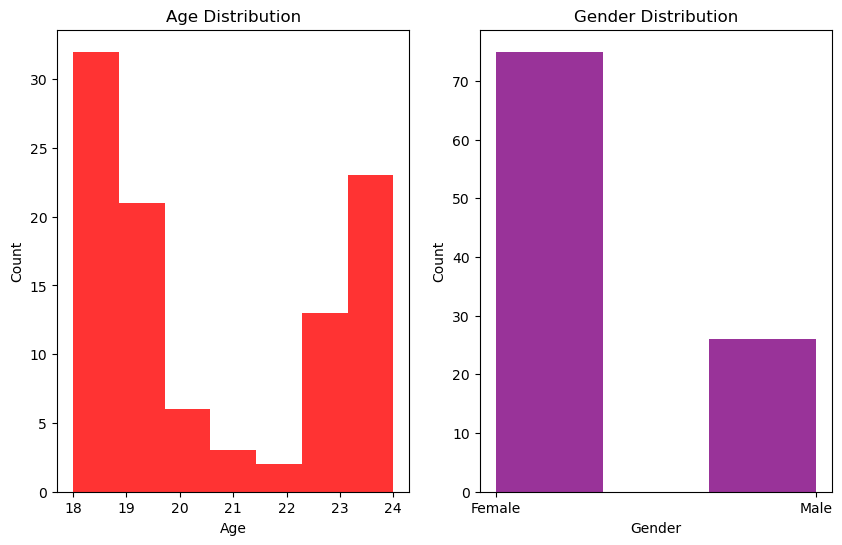

,Count
Age,
18.0,32
19.0,21
20.0,6
21.0,3
22.0,2
23.0,13
24.0,23


,Count
Gender,
Female,75
Male,26


Average Age = 20.53


In [7]:
# Create subplots 
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))

# Age distribution histogram
students.Age.hist(bins=7, color='red', alpha=0.8, ax=axes[0], grid=False)
axes[0].set_title("Age Distribution")
axes[0].set_xlabel("Age")
axes[0].set_ylabel("Count")

# Gender distribution histogram
students.Gender.hist(bins=3, color='purple', alpha=0.8, ax=axes[1], grid=False)
axes[1].set_title("Gender Distribution")
axes[1].set_xlabel("Gender")
axes[1].set_ylabel("Count")

# Display the histograms
plt.show()

# Display counts for Age and Gender columns as a dataframes
age_dist = students.groupby('Age').size().to_frame(name='Count')
gender_dist = students.groupby('Gender').size().to_frame(name='Count')
display(age_dist, gender_dist)

# Average age
age_stats = students['Age'].describe()
print(f"Average Age = {age_stats['mean']}")

> As shown above, this dataset primarily examines females, with 75 of the students being females, and the remaining 26 being males. 
The ages also range from 18 to 24 in the data, with the majority being 32 18 year-olds, and the minimum being only two 22 year-old students. The average age in this group was calculated to be 20.53, so we can clearly see that majority of the students in this dataset are younger.

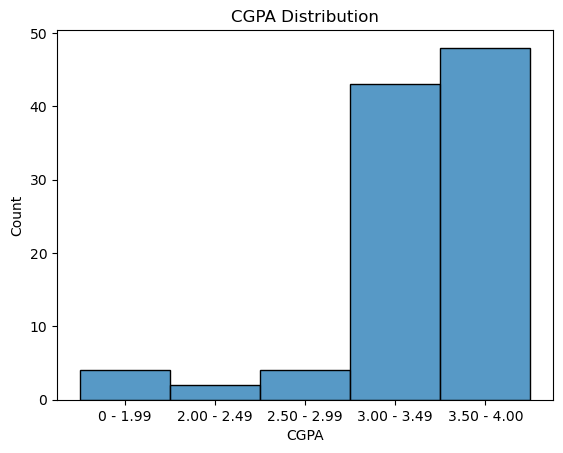

In [8]:
# Display histplot of student CGPA values sorted in increasing order
sns.histplot(students.CGPA.sort_values())

# Set x-axis to be CGPA ranges, and y-axis to be counts
plt.xlabel("CGPA")
plt.ylabel("Count")
plt.title('CGPA Distribution')

plt.show()

> The graph above shows most of the students have higher CGPAs in this dataset

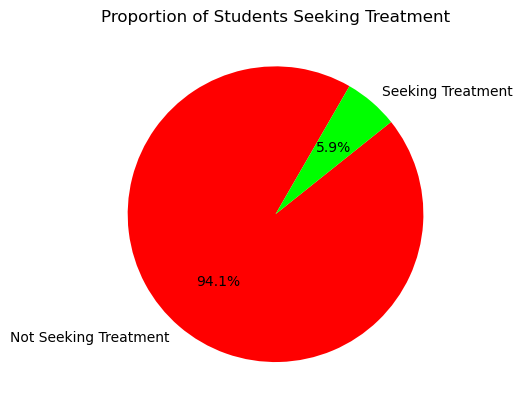

In [9]:
# Display a pie chart of students seeking treatment vs. not seeking treatment 
plt.pie(students.Treatment.value_counts(), labels=["Not Seeking Treatment", "Seeking Treatment"], autopct="%1.1f%%", startangle=60, colors=['red', 'lime'])
plt.title('Proportion of Students Seeking Treatment')
plt.show()

> This pie chart shows that majority of the students are not seeking treatment. 94.1% of students are not seeking any treatment, while only 5.9% are.

### Age vs. Depression, Anxiety, Panic Attacks

In [10]:
# Compare student age with depression, anxiety, and panic attacks seperately using loc and compute means
print(f"Average Age With Depression: {round(students.loc[students.Depression == 1].Age.mean(), 2)}")
print(f"Average Age With Anxiety: {round(students.loc[students.Anxiety == 1].Age.mean(), 2)}")
print(f"Average Age With Panic Attacks: {round(students.loc[students.Depression == 1].Age.mean(), 2)}")

Average Age With Depression: 20.29
Average Age With Anxiety: 20.21
Average Age With Panic Attacks: 20.29


> The average age of students who experience depression, anxiety, or panic attacks appears to be younger. It is important to note that majority of the ages in the dataset were younger students, but there are still a good amount of senior students. This suggests that on average, more younger students experience either depression, anxiety, or panic attacks than older students.

### Year vs. Depression, Anxiety, Panic Attacks

In [11]:
# Convert numeric values back to 'Yes' and 'No' to improve readability
students.Depression = students.Depression.replace({0: 'No', 1: 'Yes'})
students.Anxiety = students.Anxiety.replace({0: 'No', 1: 'Yes'})
students['Panic Attacks'] = students['Panic Attacks'].replace({0: 'No', 1: 'Yes'})

# Display table of students in each year with depression
year_depression = students.groupby(['Year', 'Depression']).size().unstack()
year_depression['Percentage'] = ((year_depression['Yes'] / (year_depression['No'] + year_depression['Yes'])) * 100).round(1)
display(year_depression)

# Display table of students in each year with anxiety
year_anxiety = students.groupby(['Year', 'Anxiety']).size().unstack()
year_anxiety['Percentage'] = ((year_anxiety['Yes'] / (year_anxiety['No'] + year_anxiety['Yes'])) * 100).round(1)
display(year_anxiety)

# Display table of students in each year with panic attacks
year_panic = students.groupby(['Year', 'Panic Attacks']).size().unstack()
year_panic['Percentage'] = ((year_panic['Yes'] / (year_panic['No'] + year_panic['Yes'])) * 100).round(1)
display(year_panic)

Depression,No,Yes,Percentage
Year,,,
1,29,14,32.6
2,16,10,38.5
3,14,10,41.7
4,7,1,12.5


Anxiety,No,Yes,Percentage
Year,,,
1,29,14,32.6
2,16,10,38.5
3,16,8,33.3
4,6,2,25.0


Panic Attacks,No,Yes,Percentage
Year,,,
1,29,14,32.6
2,18,8,30.8
3,14,10,41.7
4,7,1,12.5


> Interestingly, these tables show a reasonably equal split on percentages of students with facing mental health issues for each year. It appears that the highest percentage (41.7%) of third-year students experience depression and panic attacks, while mainly second-year students experience anxiety, with a percentage of 38.5%.

[Text(0.5, 1.0, 'Year vs. Panic Attacks')]

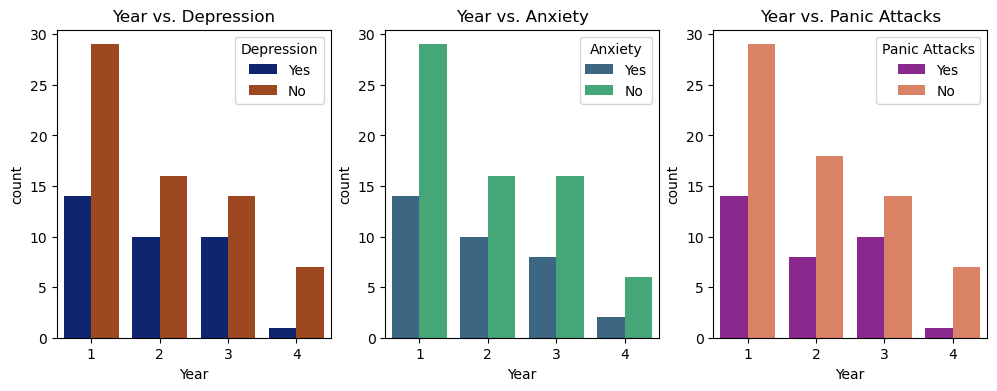

In [12]:
# Create subplots to display year vs. depression, anxiety, and panic attacks 
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

# Creating subplot for each variable and customizing it
sns.countplot(data=students, x="Year", hue="Depression", palette='dark', ax=axes[0]).set(title='Year vs. Depression')
sns.countplot(data=students, x="Year", hue="Anxiety", palette='viridis', ax=axes[1], hue_order=["Yes", "No"]).set(title='Year vs. Anxiety')
sns.countplot(data=students, x="Year", hue="Panic Attacks", palette='plasma', ax=axes[2]).set(title='Year vs. Panic Attacks')

> The figure above further proves that the proportion of second and third-year students who deal with mental health issues is much larger than the proportion of first and fourth-year students. There are clearly many more first-year students in this dataset, which is why I chose to analyze percentages and proportions rather than raw counts. 

### Are Upper-Years More Likely to Seek Treatment?


In [13]:
# Display table comparing year of study with likelihood of seeking treatment using groupby
treatment = students.groupby(['Year', 'Treatment']).size().unstack().fillna(0)
display(treatment)

Treatment,0,1
Year,,
1,40.0,3.0
2,24.0,2.0
3,23.0,1.0
4,8.0,0.0


> While looking at the dataset, one of the initial questions I had was if upper-year students would be more able to seek treatment as they may have easier access to it. However, the data above shows that students across all four years are unlikely to seek treatment, and due to the skewness of the data, there is not enough information to answer the question. 

### CGPA vs. Depression, Anxiety, Panic Attacks

In [14]:
# Create dataframes comparing CGPA with depression, anxiety, and panic attacks using groupby
cgpa_depression = students.groupby(['CGPA', 'Depression']).size().unstack().fillna(0)
cgpa_anxiety = students.groupby(['CGPA', 'Anxiety']).size().unstack().fillna(0)
cgpa_panic = students.groupby(['CGPA', 'Panic Attacks']).size().unstack().fillna(0)

# Display the tables
display(cgpa_depression, cgpa_anxiety, cgpa_panic)

Depression,No,Yes
CGPA,,
0 - 1.99,4.0,0.0
2.00 - 2.49,2.0,0.0
2.50 - 2.99,1.0,3.0
3.00 - 3.49,24.0,19.0
3.50 - 4.00,35.0,13.0


Anxiety,No,Yes
CGPA,,
0 - 1.99,4.0,0.0
2.00 - 2.49,2.0,0.0
2.50 - 2.99,3.0,1.0
3.00 - 3.49,28.0,15.0
3.50 - 4.00,30.0,18.0


Panic Attacks,No,Yes
CGPA,,
0 - 1.99,3,1
2.00 - 2.49,1,1
2.50 - 2.99,1,3
3.00 - 3.49,34,9
3.50 - 4.00,29,19


> Majority of the students who go through depression, anxiety, and panic attacks seem to be students with higher CGPAs.

## Discussion

The exploration and analysis of the dataset concerning the mental health of university students has revealed meaningful insights. Visualizing distributions in the dataset highlighted that the majority of the students were younger and in their first year of studies. Notably, majority of the students had high CGPAs, and only 5.9% of the students sought mental health treatment. The initial inquiry was if the student's year of study correlates to their mental health. After a comprehensive analysis, it can be said that the majority of students with depression, anxiety, or panic attacks seems to be students in their second and third-year of study. Several plausible explanations for these results include; students being faced with more challenging coursework or experiencing a significant increase in workload going from first to second or second to third year, pressure associated with obtaining internships or co-op opportunities, and more responsibilites outside of class time such as making impressive projects. 

## References

Source data: https://www.kaggle.com/datasets/shariful07/student-mental-health/data <br>pandas for data manipulation</br>Seaborn for data viz
<br>Matplotlib for data viz</br>
